Скачайте двнные классификации листьев растений по ссылке.
https://archive.ics.uci.edu/ml/machine-learning-databases/00241/

Загрузим файл `data_Mar_64.txt`.

In [2]:
import pandas as pd
import numpy as np
# from google.colab import files
# uploder = files.upload()

In [3]:
data = pd.read_csv('data_Mar_64.txt', header=None)


Первый столбец - ответ, положим его в отдельную переменную.

In [4]:
X, y_name = np.array(data.iloc[:, 1:]), data.iloc[:, 0]

Целевая переменная принимает текстовое значение. С помощью `LabelEncoder` из `sklearn` закодируй тектовую переменную `y_name` и сохраните полученные значения в переменную `y`.

In [6]:
from sklearn.preprocessing import LabelEncoder

In [8]:
Label__Encoder = LabelEncoder()
y = Label__Encoder.fit_transform(y_name)
print(f"y_name:\n{y_name}\ny:{y}")


y_name:
0        Acer Campestre
1        Acer Campestre
2        Acer Campestre
3        Acer Campestre
4        Acer Campestre
             ...       
1595    Zelkova Serrata
1596    Zelkova Serrata
1597    Zelkova Serrata
1598    Zelkova Serrata
1599    Zelkova Serrata
Name: 0, Length: 1600, dtype: object
y:[ 0  0  0 ... 99 99 99]


С помощью метода главных компонент снизьте размерность признакового пространства до двух. Зафиксируйте `random_state=0`

In [9]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components = 2, random_state = 0)
pca_fix = pca.fit_transform(X)

Выберите объекты, которые соответствуют значениям от 0 до 14 целевой переменной `y`. Изобразите выбранные объекты в двумерном пространстве признаков с помощью метода `scatter` из `matplotlib.pyplot`. Чтобы разным цветом отобразить объекты разных классов, в метод `scatter` передайте `c = y[y<15]`.

In [19]:
import matplotlib.pyplot as plt

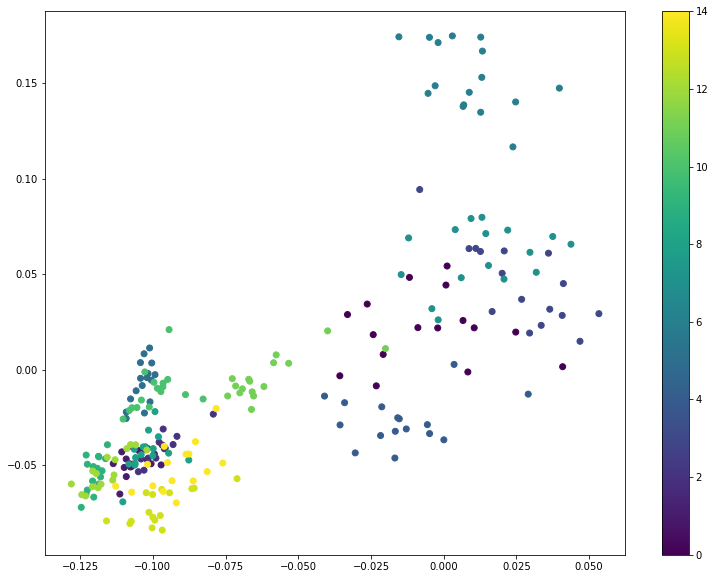

In [20]:
plt.figure(figsize = (13, 10))
plt.scatter(pca_fix[y < 15][:, 0], pca_fix[y < 15][:, 1], c = y[y < 15])
plt.colorbar()
plt.show()

Проделайте тоже самое для метода TSNE.

In [26]:
from sklearn.manifold import TSNE

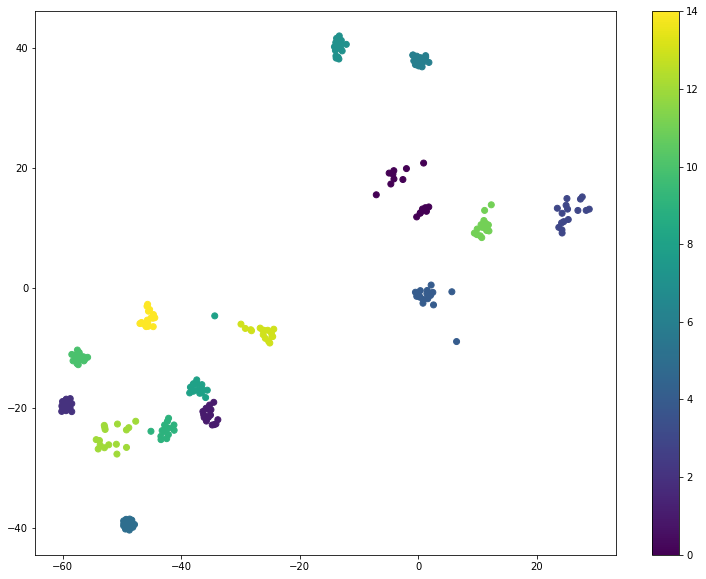

In [29]:
tsne = TSNE(n_components = 2, random_state = 0)
tsne_fix = tsne.fit_transform(X)
plt.figure(figsize = (13, 10))
plt.scatter(tsne_fix[y < 15][:, 0], tsne_fix[y < 15][:, 1], c = y[y < 15])
plt.colorbar()
plt.show()

1. Укажите координаты объекта с индексом 0 (`X[0]`) после применения метода TSNE. Округлите числа до сотых.

In [42]:
#i(-7.12_15.60)
print("i(" + str(round(tsne_fix[0][0], 2)) + "_" + str(round(tsne_fix[0][1], 2)) + ")")

i(-7.12_15.6)


Укажите координаты объекта с индексом 0 (X[0]) после применения метода PCA. Округлите числа до сотых.

In [43]:
print("i(" + str(round(pca_fix[0][0], 2)) + "_" + str(round(pca_fix[0][1], 2)) + ")")

i(-0.03_0.03)


3. Какие выводы можно сделать из полученных изображений?
С помощью метода TSNE удалось визуализировать объекты на плоскоти и объекты разных класов визуально разделимы


## K_means

Реализуйте класс MyKMeans.

Класс должен соответствовать шаблону, который приведен ниже

В конструктор класса передаются:
- n_clusters - число кластеров, на которое будут разбиты данные

- n_iters - максимальное число итераций, может быть сделано в данном алгоритме

В методе `fit`:

- self.centers - центры кластеров, которые пересчитываются на каждой итерации. Изначально выбираются случайным образом с фиксированным seed.

далее в цикле по числу итераций вам необходимо реализовать:
-  вычисление ближайшего центра кластера для каждого объекта
- пересчет центра каждого кластера( среднее каждой из координат всех объектов, отнесенных к этому кластеру)
посчитанные новые центры кластеров положите в переменную `new_centers`

В методе `predict`:

вычисляются ближайшие центры кластеров для объектов `X`




In [132]:
from sklearn.metrics import pairwise_distances_argmin
from numpy.linalg import norm
class MyKMeans():
    def __init__(self, n_clusters=3, n_iters = 100):
        self.n_clusters = n_clusters
        self.n_iters = n_iters
    
    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis = 0)
        return centroids

    
    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis = 1)
            distance[:, k] = np.square(row_norm)
        return distance

    
    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis = 1)
      
        
    def fit(self, X):
        np.random.seed(0)
        self.centers = np.random.uniform(low = X.min(axis = 0),
                                high = X.max(axis = 0),
                                size = (self.n_clusters, X.shape[1]))

        for it in range(self.n_iters):
            self.last_iter = it
            distance = self.compute_distance(X, self.centers)
            labels = self.find_closest_cluster(distance)
            new_centers = self.compute_centroids(X, labels)
            
            if np.all(self.centers == new_centers):
                break
            self.centers = new_centers


    def predict(self, X):
        labels = pairwise_distances_argmin(X, self.centers)
        return labels

Сгенерируем данные для кластеризации

In [133]:
from sklearn import datasets
n_samples = 1000

noisy_blobs = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 3.0, 0.5],
                             random_state=0)

In [134]:
X, y = noisy_blobs

4. Кластеризуйте объекты noisy_blobs с помощью `MyKMeans`, используйте гиперпараметры `n_clusters=3`, `n_iters=100`. Укажите ответ для объекта с индексом 1.

In [162]:
My_K_Mean_iter100 = MyKMeans(n_clusters = 3, n_iters = 100)
My_K_Mean_iter100.fit(X)
print(My_K_Mean_iter100.predict(X)[1])

0


5. Кластеризуйте объекты noisy_blobs, используйте гиперпараметры n_clusters=3, n_iters = 5. Укажите ответ для объекта с индексом 1.

In [158]:
My_K_Mean_iter5 = MyKMeans(n_clusters = 3, n_iters = 5)
My_K_Mean_iter5.fit(X)
print(My_K_Mean_iter5.predict(X)[1])

0


6. Вычислите у какого числа объектов изменилась метка предсказываемого кластера при изменении гиперпараметра n_iters с 5 до 100

In [141]:
Object_iter100 = My_K_Mean_iter100.predict(X)
Object_iter5 = My_K_Mean_iter5.predict(X)
n = 0
for i in enumerate(Object_iter100):
    if Object_iter5[i[0]] != i[1]:
        n += 1
print(n)

17


In [152]:
len(Object_iter100[Object_iter100 != Object_iter5])

17

7. Определите сколько за сколько итераций сошелся алгоритм на объектах объекты noisy_blobs?

In [153]:
print(f"n = 100\t{My_K_Mean_iter100.last_iter}")
print(f"n = 5\t{My_K_Mean_iter5.last_iter}")

n=100	10
n=5	4


## DBSCAN

8. Кластеризуйте объекты noisy_blobs с помощью DBSCAN. Используйте реализацию DBSCAN из sklearn. Зафиксируйте гиперпараметр eps=1. Укажите ответ для объекта с индексом 1.

In [166]:
from sklearn.cluster import DBSCAN

In [179]:
dbscan = DBSCAN(eps = 0.5)
clustering = dbscan.fit_predict(X)
clustering[1]

0

9. Укажите полученное число кластеров?

In [180]:
len(np.unique(clustering[clustering != -1]))

11

10. Сколько объектов было отнечено к выбросам (имеют метку -1)?

In [181]:
len(clustering[clustering == -1])

152